In [27]:
%matplotlib inline
import sys
import os
import numpy
import struct
sys.path.append(os.path.expanduser("~/jng/sunshine/noddy"))

In [2]:
import weather
from datetime import date, timedelta

In [3]:
ls -al ../*.gz

-rw-rw-r-- 1 ec2-user ec2-user  4950057941 Jan 30 11:37 ../era-interim.photo.activ.rad.1979-1989.nc.gz
-rw-rw-r-- 1 ec2-user ec2-user 11695037003 Jan 30 04:44 ../era-interim.photo.activ.rad.1990-2015.nc.gz
-rw-rw-r-- 1 ec2-user ec2-user  8499877065 Jan 31 03:22 ../evaporation.daily.1979-2015.csv.gz
-rw-rw-r-- 1 ec2-user ec2-user  9860560980 Feb 11 19:26 ../photo.rad.daily.1979-2015.csv.gz
-rw-rw-r-- 1 ec2-user ec2-user  7672107651 Jan 30 22:42 ../precipitation.daily.1979-2015.csv.gz
-rw-rw-r-- 1 ec2-user ec2-user  9817844672 Jan 31 20:53 ../tmax.daily.1979-2015.csv.gz
-rw-rw-r-- 1 ec2-user ec2-user  9822909207 Feb  1 17:57 ../tmin.daily.1979-2015.csv.gz


In [4]:
ls -al

total 16393764
drwxrwxr-x  4 ec2-user ec2-user        4096 Mar 28 21:16 ./
drwxr-xr-x  5 ec2-user ec2-user        4096 Mar 28 20:27 ../
drwxrwxr-x 32 ec2-user ec2-user        4096 Mar 28 21:29 euro/
drwxr-xr-x  2 ec2-user ec2-user        4096 Mar 28 20:20 .ipynb_checkpoints/
-rw-rw-r--  1 ec2-user ec2-user       30121 Mar 28 21:16 karmapi.ipynb
-rw-r--r--  1 ec2-user ec2-user  2717458425 Mar 24 19:33 precipitation.csv.gz
-rw-r--r--  1 ec2-user ec2-user 14069695680 Mar 25 05:03 tmax.csv


In [5]:
data = weather.get_data(date(1979,1,1), open('tmax.csv'))

In [6]:
def tonumpy(data):
    
    ndata = numpy.array([float(x) for x in data.split()])
    ndata = ndata.reshape(weather.longitudes(), weather.latitudes()).T
    return ndata

In [7]:
from matplotlib import pyplot

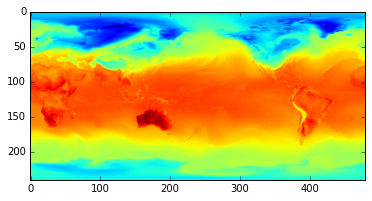

In [8]:
data = tonumpy(data)
pyplot.imshow(data)

In [9]:
!mkdir euro

mkdir: cannot create directory ‘euro’: File exists


In [10]:
# mmake some directories
delta = weather.DELTA
lon = weather.LONGITUDE_START
for ix in range(weather.longitudes()):
    folder = 'euro/{}'.format(lon)
    
    try:
        os.makedirs(folder) 
    except:
        pass
    
    lat = weather.LATITUDE_START
    for ix in range(weather.latitudes()):
    
        folder = 'euro/{}/{}'.format(lon, lat)
    
        try:
            os.makedirs(folder)
        except:
            pass
        
        lat -= delta
    lon += delta

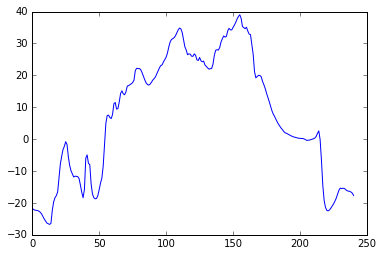

In [15]:
pyplot.plot(data[:,30])

In [48]:
# open a file for each lon
lons = numpy.linspace(weather.LONGITUDE_START, 360.0, weather.longitudes())

lons = !ls euro

outfiles = [open('euro/{}/tmax'.format(x), 'ab') for x in lons]

In [55]:
def write_day(data, date, outfiles):

    packer = struct.Struct('{}f'.format(weather.latitudes()))

    for ix in range(weather.longitudes()):
    
        col = data[:, ix]
        pdata = packer.pack(*col)
    
        outfiles[ix].write(pdata)

    

In [61]:
def process_days(start, end, infile, outfiles):
    
    day = start
    while day < end:
        if day.day == 1: print(day)
        data = tonumpy(weather.get_data(day, infile))
        
        write_day(data, date, outfiles)
        
        day += timedelta(days=1)


In [62]:
infile = open('tmax.csv')
process_days(date(1980,1,1), date(1989,1,1), infile, outfiles)

In [63]:
for out in outfiles: out.close()

In [83]:
# get data for a lat lon
def lat_lon(lat, lon, value='tmax'):
    
    # read all data for lon
    infile = "euro/{lat}/{value}".format(**locals())
    
    data = open(infile, 'rb').read()
    
    print(len(data)/4)
    
    unpack = struct.Struct('{}f'.format(int(len(data)/4)))
    
    return unpack.unpack(data)


In [94]:
data = lat_lon(0.0, 0.0)

880373.0


In [91]:
d = data[90::241]

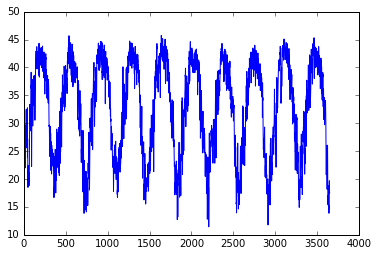

In [92]:
pyplot.plot(d)